# Chapter 4 - Likelihoods

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 4.1 Blog blues
Suppose that visits to your newly launched blog occur sporadically. Imagine you are interested in
the length of time between consecutive first-time visits to your homepage. You collect the time
data for a random sample of 50 visits to your blog for a particular time period and day, and you
decide to build a statistical model to fit the data.

**Problem 4.1.1** What assumptions might you make about the first-time visits?

**Answer:** As we are interested in the first-time visits, we can assume that the visits are IID:
* independent: the time between visits is not affected by the time of the previous visit.
* identically distributed: the people who visit the blog share some tastes.
* visits occurs continously at a constant rate.

**Problem 4.1.2** What might be an appropriate probability model for the time between visits?

**Answer:** Given the above assumptions, if the number of visits are poisson distributed, we can use an exponential distribution to model the time between visits.

**Problem 4.1.3** Using your chosen probability distribution from the previous part, algebraically derive the maximum likelihood estimate (MLE) of the mean.

**Answer:** Based on the independence assumption, the likelihood can be written as:

$$
\begin{align}
p(t_1, t_2, \dots, t_n|\lambda) &= \prod_{i=1}^n p(t_i|\lambda) = \prod_{i=1}^n \lambda e^{-\lambda t_i} \\ 
\end{align}
$$

calculating the log-likelihood:

$$
\begin{align}
log(p(t_1, t_2, \dots, t_n|\lambda)) &= log \bigg(\prod_{i=1}^n \lambda e^{-\lambda t_i}\bigg) = \sum_{i=1}^{n} log(\lambda e^{-\lambda t_i}) \tag{2}\\
                                     &= \sum_{i=1}^{n} log(\lambda) + log(e^{-\lambda t_i}) = \sum_{i=1}^{n} log(\lambda) - \lambda t_i \tag{3}\\
                                     &= n log(\lambda) - n t_{i} \lambda \tag{4}
\end{align}
$$

taking the derivative of the log-likelihood with respect to $\lambda$ and setting it to zero:

$$
\begin{align}
\frac{\partial \text{log} p}{\partial \lambda} &= \frac{n}{\lambda} - n t_{i} = 0 \tag{5}\\
\end{align}
$$

solving for $\lambda$, we calculate that $\hat\lambda=\frac{1}{t}$ is the MLE of the mean. 

**Problem 4.1.4**: You collect data from Google Analytics that contains the time (in minutes)
between each visit for a sample of 50 randomly chosen visits to your blog. The data set is
called `likelihood_blogVisits.csv`. Derive an estimate for the mean number of visits
per minute.

**Answer:** According to $(5)$ in the previous problem, an estimate of the mean number of visits per minute is $\hat\lambda=\frac{1}{t} \approx 1.63$, where $t$ is the average time between visits.

In [9]:
blog = pd.read_csv('../data/likelihood_blogVisits.csv', names=['visits'])
blog.head()

,visits
0,1.366967
1,0.065920
2,0.968358
3,0.174096
4,0.889502


In [11]:
1 / blog['visits'].mean()

1.6262145862718507

**Problem 4.1.5**: Graph the log-likelihood near the MLE. Why do we not plot the likelihood?

**Answer:** The plot is presented below. We do not plot the likelihood because the multiplication of probabilities yields very small numbers, which are difficult to compute.

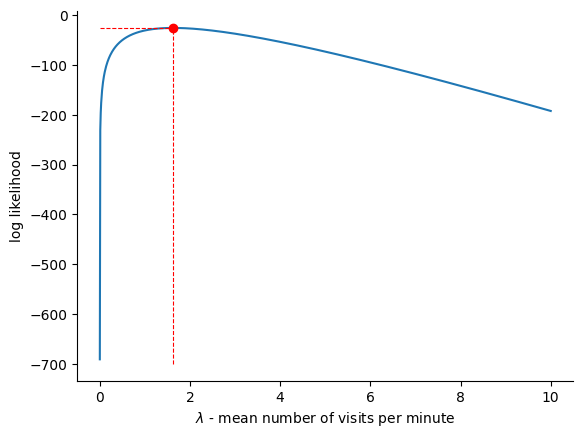

In [41]:
# Define the lambda linespace
lmbda = np.linspace(0.000001, 10, 1000)

# Define the likelihood function
def likelihood(lmbda, n, t):
    return n * np.log(lmbda) - n * t * lmbda

# Calculate the likelihood for each lambda value
logll = likelihood(lmbda, 50, blog['visits'].mean())

# Plot the likelihood
plt.plot(lmbda, logll)

# Find the maximum likelihood
xmax = lmbda[np.argmax(logll)]
ymax = logll.max()

# Plot the maximum likelihood
plt.plot(xmax, ymax, 'ro')

# Add vertical line at the maximum likelihood that touches the x-axis and the likelihood curve
plt.vlines(xmax, -700, ymax, linestyles='dashed', color='red', linewidth=0.8)
plt.hlines(ymax, 0, xmax, linestyles='dashed', color='red', linewidth=0.8)

# Remove top and right spine from plot
sns.despine()

# Add axis labels
plt.xlabel('$\lambda$ - mean number of visits per minute')
plt.ylabel('log likelihood')

plt.show()